In [1]:
!pip install pyDrive
import nltk
nltk.download('popular')
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import files
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

In [2]:
download = drive.CreateFile({'id':'1x5hP9T7mc4OsG82SkwuJnI32shyak_57'})
text = download.GetContentFile("data_latih.json")
text = open("data_latih.json", "r").read()
text

'[\n\t{"sentimen": "netral", "isi": "RT @AhokDjarot: Penasaran sama #BasukiDjarot? Punya #PertanyaanKepo yg ingin dijawab? RT dgn #KepoinPelayanJakarta ! Pertanyaan terpilih ak\\u2026", "tanggal": "Tue Apr 04 14:04:05 +0000 2017", "id_user": 823082326213021696, "akun": "@AhokDjarot"},\n\t{"sentimen": "positif", "isi": "@AhokDjarot Melayani warga jakarta mulai dari lahir dengan berbagai program.. #FreeAhok @basuki_btp https://t.co/jrzDjWO5EE", "tanggal": "Tue Apr 04 14:00:01 +0000 2017", "id_user": 3166296157, "akun": "@AhokDjarot"},\n\t{"sentimen": "negatif", "isi": "@Lintank01 @AhokDjarot Golongan sumbu pendek lo. Fpi piaraan kluarga cendana. Bibib risiek ulama mesum. Bisanya demo gak mau kerja.", "tanggal": "Tue Apr 04 13:56:37 +0000 2017", "id_user": 799108167170949121, "akun": "@AhokDjarot"},\n\t{"sentimen": "positif", "isi": "RT @RahyaMaya: https://t.co/pvVUIp3YYw Pak Ahok itu didzolimi... Aku yakin Pak Ahok bebas... #FreeAhok @basuki_btp @AhokDjarot https://t.co\\u2026", "tanggal

In [3]:
import pandas as pd
df = pd.read_json("data_latih.json")
df.head()

,akun,id_user,isi,sentimen,tanggal
0,@AhokDjarot,823082326213021696,RT @AhokDjarot: Penasaran sama #BasukiDjarot? ...,netral,Tue Apr 04 14:04:05 +0000 2017
1,@AhokDjarot,3166296157,@AhokDjarot Melayani warga jakarta mulai dari ...,positif,Tue Apr 04 14:00:01 +0000 2017
2,@AhokDjarot,799108167170949121,@Lintank01 @AhokDjarot Golongan sumbu pendek l...,negatif,Tue Apr 04 13:56:37 +0000 2017
3,@AhokDjarot,710566116553166849,RT @RahyaMaya: https://t.co/pvVUIp3YYw Pak Aho...,positif,Tue Apr 04 13:52:44 +0000 2017
4,@AhokDjarot,1335669534,Prof. Edward Omar Sharif H. (Ahli Pidana) : Me...,positif,Tue Apr 04 13:50:01 +0000 2017


In [4]:
df.sentimen.value_counts()

positif    291
negatif    181
netral     178
Name: sentimen, dtype: int64

## **Clean All Data**

In [0]:
from bs4 import BeautifulSoup

import re
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
pat3 = r'RT @[A-Za-z0-9]+'
pat4 = r'http://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2, pat3, pat4))
download = drive.CreateFile({'id':'18dD8-NNX4abeJblPnJpE-20K_YGzVoFM'})
stop_words = download.GetContentFile("stopword_list_TALA.txt")
stop_words = set([w for w in open('stopword_list_TALA.txt', 'r')])

def tweet_cleaner(isi):
    soup = BeautifulSoup(isi, 'html.parser')
    souped = soup.get_text()
    stripped = re.sub(combined_pat,'', souped)
    try:
        clean = stripped.decode("utf-8").replace(u"\ufffd","?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    words = tok.tokenize(lower_case)
    filtered_words = [w for w in words if not w in stop_words]
    return (" ".join(filtered_words)).strip()

In [6]:
%%time
print("Cleaning and parsing the tweets ...\n")
clean_tweet_texts = []
for i in range(len(df)):
    clean_tweet_texts.append(tweet_cleaner(df['isi'][i]))
print("Done!")

Cleaning and parsing the tweets ...

Done!
CPU times: user 115 ms, sys: 7 ms, total: 122 ms
Wall time: 118 ms


In [7]:
clean_df = pd.DataFrame(clean_tweet_texts, columns=['isi'])
clean_df['sentimen'] = df.sentimen
clean_df.head()

,isi,sentimen
0,penasaran sama basukidjarot punya pertanyaanke...,netral
1,melayani warga jakarta mulai dari lahir dengan...,positif
2,golongan sumbu pendek lo fpi piaraan kluarga c...,negatif
3,pak ahok itu didzolimi aku yakin pak ahok beba...,positif
4,prof edward omar sharif h ahli pidana menurut ...,positif


In [8]:
!pip install Sastrawi
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

## **Tambahkan Dictionary dan Key_norm**

In [0]:
download = drive.CreateFile({'id':'1XvQX3Px8kumkT4tn4_ayQrtkpmaBidNY'})
text = download.GetContentFile("dictionary.csv")
dic = pd.read_csv("dictionary.csv")

download = drive.CreateFile({'id':'1uTgGRaGkrdpitgUsO9D1KbZ6gICJkTar'})
text = download.GetContentFile("key_norm.csv")
norm = pd.read_csv("key_norm.csv")

In [10]:
#normalisasi
norm_dic = pd.Series(norm.hasil.values,index=norm.singkat).to_dict()

def replace_norm(isi):
    text_tokenized = nltk.word_tokenize(isi.lower())
    text = " ".join(word if word not in norm_dic else norm_dic[word] for word in text_tokenized)
    return text

clean_df["isi"] = clean_df["isi"].apply(lambda x: replace_norm(x))
clean_df.head()

,isi,sentimen
0,penasaran sama basukidjarot punya pertanyaanke...,netral
1,melayani warga jakarta mulai dari lahir dengan...,positif
2,golongan sumbu pendek kamu fpi piaraan keluarg...,negatif
3,pak ahok itu didzolimi saya yakin pak ahok beb...,positif
4,prof edward omar sharif h ahli pidana menurut ...,positif


In [11]:
# Stemming
sf = StemmerFactory()
stemmer = sf.create_stemmer()
clean_df["isi"] = clean_df["isi"].map(stemmer.stem)
clean_df.head()

,isi,sentimen
0,penasaran sama basukidjarot punya pertanyaanke...,netral
1,layan warga jakarta mulai dari lahir dengan ba...,positif
2,golong sumbu pendek kamu fpi piara keluarga ce...,negatif
3,pak ahok itu didzolimi saya yakin pak ahok beb...,positif
4,prof edward omar sharif h ahli pidana turut pn...,positif


##**Golongkan masing-masing sentimen**

In [12]:
# Data Netral
netral = clean_df.loc[clean_df.sentimen=='netral', ['isi']]
netral.to_csv('clean_data_latih_netral.csv')
netral = pd.read_csv('clean_data_latih_netral.csv', index_col=0)
netral.head()

,isi
0,penasaran sama basukidjarot punya pertanyaanke...
7,penasaran sama basukidjarot punya pertanyaanke...
74,btp ahokdjarotdirosi bagai warga luar dki hara...
76,pak ahok saya tkw saudi saya ingin kerja bersi...
90,berapa banyak ya kembar pak wakil gubernur btp


In [13]:
# Data Positif
positif = clean_df.loc[clean_df.sentimen=='positif', ['isi']]
positif.to_csv('clean_data_latih_positif.csv')
positif = pd.read_csv('clean_data_latih_positif.csv', index_col=0)
positif.head()

,isi
1,layan warga jakarta mulai dari lahir dengan ba...
3,pak ahok itu didzolimi saya yakin pak ahok beb...
4,prof edward omar sharif h ahli pidana turut pn...
5,pak ahok itu didzolimi saya yakin pak ahok beb...
6,gaul pak ahok djarot paling gaul badai bisa ta...


In [14]:
# Data Negatif
negatif = clean_df.loc[clean_df.sentimen=='negatif', ['isi']]
negatif.to_csv('clean_data_latih_negatif.csv')
negatif = pd.read_csv('clean_data_latih_negatif.csv', index_col=0)
negatif.head()

,isi
2,golong sumbu pendek kamu fpi piara keluarga ce...
9,lah ahok di penjara bersih penjara saja biar d...
14,gaul wkwkwk ada udang dbalik batu itu
15,btp di dzolimi bgmana wong sudah jelazz dia ya...
17,btp ini yang nista agama itu yaa


## **Counting Word**

In [0]:
def word_count (str): #melakukan tokenisasi dan mengukur masing-masing kata muncul berapa kali
  counts = dict()
  words = str.split()
  
  for word in words:
    if word in counts:
      counts[word] += 1
    else:
      counts[word] = 1
  
  return counts

In [16]:
import csv
csv_file =('Enter the name of your input file: ')
txt_file = ('Enter the name of your output file: ')
with open('netral_tweet.txt', "w") as my_output_file:
    with open('clean_data_latih_netral.csv', "r") as my_input_file:
        [ my_output_file.write(" ".join(row)+'\n') for row in csv.reader(my_input_file)]
    my_output_file.close()

text1 = open ('netral_tweet.txt', "r").read()
a = word_count(text1)
a

{'0': 1,
 '102': 1,
 '103': 1,
 '105': 1,
 '106': 1,
 '107': 1,
 '108': 1,
 '109': 1,
 '110': 1,
 '111': 1,
 '123': 1,
 '124': 1,
 '134': 1,
 '144': 1,
 '149': 1,
 '151': 1,
 '155': 1,
 '156': 1,
 '163': 1,
 '184': 1,
 '207': 1,
 '224': 1,
 '245': 1,
 '248': 1,
 '255': 1,
 '258': 1,
 '259': 1,
 '265': 1,
 '273': 1,
 '280': 1,
 '290': 1,
 '291': 1,
 '292': 1,
 '295': 1,
 '296': 1,
 '314': 1,
 '317': 1,
 '326': 1,
 '328': 1,
 '345': 1,
 '353': 1,
 '354': 1,
 '371': 1,
 '373': 1,
 '376': 1,
 '377': 1,
 '381': 1,
 '383': 1,
 '388': 1,
 '391': 1,
 '392': 1,
 '393': 1,
 '395': 1,
 '396': 1,
 '399': 1,
 '400': 1,
 '401': 1,
 '404': 1,
 '405': 1,
 '406': 1,
 '409': 1,
 '410': 1,
 '412': 1,
 '413': 1,
 '416': 1,
 '417': 1,
 '418': 1,
 '420': 1,
 '421': 1,
 '423': 1,
 '424': 1,
 '425': 1,
 '427': 1,
 '430': 1,
 '431': 1,
 '434': 1,
 '436': 1,
 '438': 1,
 '443': 1,
 '444': 1,
 '445': 1,
 '446': 1,
 '447': 1,
 '448': 1,
 '449': 1,
 '450': 1,
 '451': 1,
 '452': 1,
 '453': 1,
 '454': 1,
 '455': 1,
 

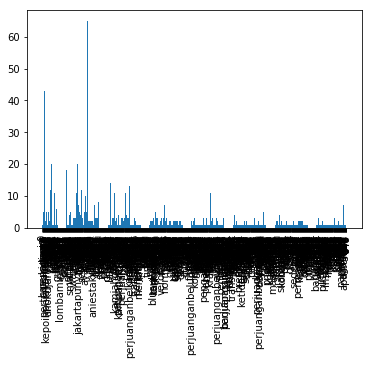

In [17]:
from matplotlib import pyplot
from wordcloud import WordCloud
pyplot.bar(range(len(a)), list(a.values()), align="center")
pyplot.xticks(range(len(a)), list(a.keys()))
pyplot.xticks(rotation=90)
pyplot.savefig("Text Netral.png")
pyplot.show()

In [18]:
with open('positif_tweet.txt', "w") as my_output_file:
    with open('clean_data_latih_positif.csv', "r") as my_input_file:
        [ my_output_file.write(" ".join(row)+'\n') for row in csv.reader(my_input_file)]
    my_output_file.close()

text2 = open ('positif_tweet.txt', "r").read()
b = word_count(text2)
b

{'isi': 1,
 '1': 1,
 'layan': 17,
 'warga': 48,
 'jakarta': 66,
 'mulai': 2,
 'dari': 22,
 'lahir': 2,
 'dengan': 55,
 'bagai': 8,
 'program': 14,
 'freeahok': 81,
 'btp': 70,
 '3': 1,
 'pak': 71,
 'ahok': 86,
 'itu': 19,
 'didzolimi': 4,
 'saya': 30,
 'yakin': 5,
 'bebas': 10,
 '4': 1,
 'prof': 1,
 'edward': 1,
 'omar': 1,
 'sharif': 1,
 'h': 2,
 'ahli': 7,
 'pidana': 2,
 'turut': 4,
 'pndpt': 1,
 'unsur': 1,
 'pasal': 1,
 'a': 2,
 'kuhp': 1,
 '5': 1,
 '6': 1,
 'gaul': 25,
 'djarot': 75,
 'paling': 6,
 'badai': 8,
 'bisa': 12,
 'tata': 9,
 'kota': 10,
 '8': 1,
 'surah': 1,
 'al': 1,
 'maidah': 1,
 'bukan': 9,
 'arti': 1,
 'untuk': 43,
 'harus': 11,
 'umat': 2,
 'pilih': 22,
 'pimpin': 16,
 'muslim': 1,
 '10': 1,
 'siap': 6,
 'tunggu': 2,
 'unggul': 7,
 '11': 1,
 '12': 1,
 'ramabaskara': 1,
 'ikuuut': 1,
 '13': 1,
 'kita': 57,
 'adalah': 20,
 'negara': 6,
 'republik': 6,
 'indonesia': 10,
 'begitu': 8,
 'juga': 18,
 'sosok': 8,
 '16': 1,
 'contoh': 4,
 'analogi': 1,
 'ada': 27,
 'orang

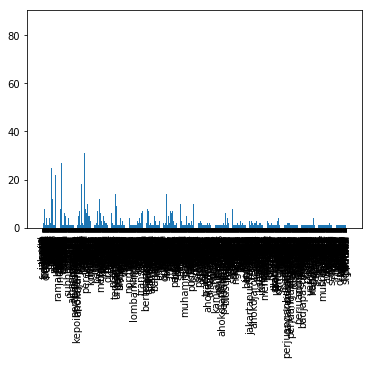

In [19]:
pyplot.bar(range(len(b)), list(b.values()), align="center")
pyplot.xticks(range(len(b)), list(b.keys()))
pyplot.xticks(rotation=90)
pyplot.savefig("Text Positif.png")
pyplot.show()

In [20]:
with open('negatif_tweet.txt', "w") as my_output_file:
    with open('clean_data_latih_negatif.csv', "r") as my_input_file:
        [ my_output_file.write(" ".join(row)+'\n') for row in csv.reader(my_input_file)]
    my_output_file.close()

text3 = open ('negatif_tweet.txt', "r").read()
c = word_count(text3)
c

{'104': 1,
 '113': 1,
 '114': 1,
 '115': 1,
 '116': 1,
 '118': 1,
 '119': 1,
 '126': 1,
 '127': 1,
 '129': 1,
 '130': 1,
 '131': 1,
 '132': 1,
 '135': 1,
 '136': 1,
 '137': 1,
 '139': 1,
 '14': 1,
 '140': 1,
 '142': 1,
 '143': 1,
 '146': 1,
 '147': 1,
 '15': 1,
 '150': 1,
 '152': 1,
 '153': 1,
 '154': 1,
 '158': 1,
 '159': 1,
 '160': 1,
 '161': 1,
 '166': 1,
 '167': 1,
 '17': 1,
 '171': 1,
 '173': 1,
 '178': 1,
 '180': 1,
 '181': 1,
 '182': 1,
 '183': 1,
 '185': 1,
 '189': 1,
 '191': 1,
 '192': 1,
 '195': 1,
 '196': 1,
 '197': 1,
 '198': 1,
 '199': 1,
 '2': 1,
 '200': 1,
 '202': 1,
 '206': 1,
 '222': 1,
 '225': 1,
 '229': 1,
 '230': 1,
 '231': 1,
 '232': 1,
 '233': 1,
 '234': 1,
 '238': 1,
 '239': 1,
 '241': 1,
 '244': 1,
 '246': 1,
 '247': 1,
 '254': 1,
 '256': 1,
 '262': 1,
 '264': 1,
 '266': 1,
 '267': 1,
 '268': 1,
 '269': 1,
 '270': 1,
 '272': 1,
 '274': 1,
 '275': 1,
 '278': 1,
 '279': 1,
 '282': 1,
 '283': 1,
 '284': 1,
 '286': 1,
 '288': 1,
 '289': 1,
 '303': 1,
 '304': 1,
 '30

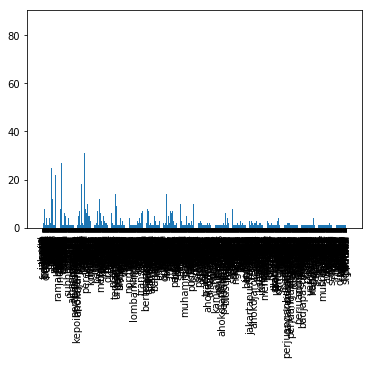

In [21]:
pyplot.bar(range(len(b)), list(b.values()), align="center")
pyplot.xticks(range(len(b)), list(b.keys()))
pyplot.xticks(rotation=90)
pyplot.savefig("Text Negatif.png")
pyplot.show()

## **Set Word Cloud**

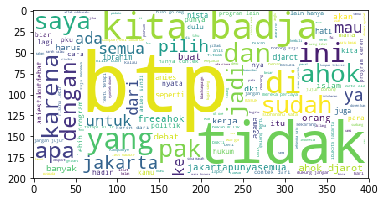

In [22]:
import wordcloud
from wordcloud import WordCloud
import matplotlib
from matplotlib import pyplot
wordcloud_netral =WordCloud(background_color='white').generate(text1)
pyplot.imshow(wordcloud_netral)

wordcloud_positif =WordCloud(background_color='white').generate(text2)
pyplot.imshow(wordcloud_positif)

wordcloud_negatif =WordCloud(background_color='white').generate(text3)
pyplot.imshow(wordcloud_negatif)

In [0]:
import numpy as np
from PIL import Image

download = drive.CreateFile({'id':'1sAx7u0T3BWBIQo0TM-BtT1-_MuGtK0l1'})
img = download.GetContentFile("neutral.png", "image/png")
my_mask = np.array(Image.open("neutral.png"))

download1 = drive.CreateFile({'id':'1sd5AT5kIbj0DOj_I1_LTfh2wTtRi-Sr4'})
img1 = download1.GetContentFile("positive.png", "image/png")
my_mask1 = np.array(Image.open("positive.png"))

download2 = drive.CreateFile({'id':'10MmHBcw4_7_Q2SoIhs711g5Zxku4V_B3'})
img2 = download2.GetContentFile("negative.png", "image/png")
my_mask2 = np.array(Image.open("negative.png"))

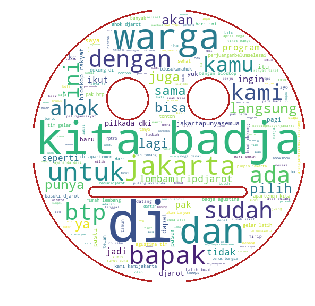

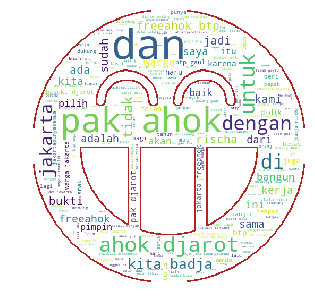

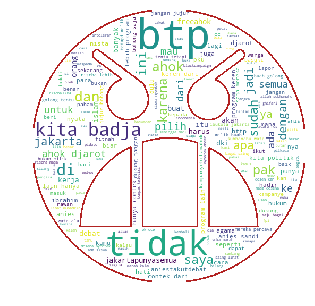

In [24]:
wordcloud = WordCloud(background_color ="white", mask=my_mask, 
               stopwords=stop_words, contour_width=3, contour_color='firebrick').generate(text1)
pyplot.figure(figsize=[5,5])
pyplot.clf()
pyplot.imshow(wordcloud)
pyplot.axis("off")
pyplot.savefig("Neutral-Masked.png", dpi=(300))
pyplot.show()

wordcloud2 = WordCloud(background_color ="white", mask=my_mask1, 
               stopwords=stop_words, contour_width=3, contour_color='firebrick').generate(text2)
pyplot.figure(figsize=[5,5])
pyplot.clf()
pyplot.imshow(wordcloud2)
pyplot.axis("off")
pyplot.savefig("Positif-Masked.png", dpi=(300))
pyplot.show()

wordcloud3 = WordCloud(background_color ="white", mask=my_mask2, 
               stopwords=stop_words, contour_width=3, contour_color='firebrick').generate(text3)
pyplot.figure(figsize=[5,5])
pyplot.clf()
pyplot.imshow(wordcloud3)
pyplot.axis("off")
pyplot.savefig("Negative-Masked.png", dpi=(300))
pyplot.show()

## **Feature Extraction**
### Bag of Words

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Vectorize
bow_transformer = CountVectorizer().fit(clean_df["isi"])
# print total number of vocab words
print("Jumlah total vocabulary:",len(bow_transformer.vocabulary_))
# example of vectorized text
sample_tweet = clean_df["isi"][50]
# Vector representation
bow_sample = bow_transformer.transform([sample_tweet])
print("Representasi vektor \"{}\"\n{}".format(sample_tweet, bow_sample))

Jumlah total vocabulary: 1563
Representasi vektor "cerita pak djarot ini bukti bahwa pak ahok peduli dengan umkm dan peduli warga kecil"
  (0, 23)	1
  (0, 126)	1
  (0, 253)	1
  (0, 279)	1
  (0, 314)	1
  (0, 334)	1
  (0, 355)	1
  (0, 531)	1
  (0, 651)	1
  (0, 998)	2
  (0, 1025)	2
  (0, 1485)	1
  (0, 1532)	1


In [26]:
messages_bow = bow_transformer.transform(clean_df["isi"])
# Check out the bag-of-words counts for the entire corpus as a large sparse matrix
print('Bag of words sparse matrix shape: ', messages_bow.shape)
print('Non zero occurences: ', messages_bow.nnz)

Bag of words sparse matrix shape:  (650, 1563)
Non zero occurences:  7552


### **Tf-Idf**

In [27]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf_sample = tfidf_transformer.transform(bow_sample)
print(tfidf_sample)

  (0, 1532)	0.164316362955695
  (0, 1485)	0.33442438439877736
  (0, 1025)	0.5660216538889641
  (0, 998)	0.309973520657397
  (0, 651)	0.29001033670173326
  (0, 531)	0.17160844161269181
  (0, 355)	0.14562001222350252
  (0, 334)	0.1591350166789567
  (0, 314)	0.15330474034536368
  (0, 279)	0.3076476926596444
  (0, 253)	0.21200763138800244
  (0, 126)	0.31934453363458576
  (0, 23)	0.1397646612860068


### **Classification**

In [0]:
from sklearn.model_selection import train_test_split
trainingSet, testSet = train_test_split(clean_df, test_size=0.2, stratify=clean_df['sentimen'], random_state=0)

In [31]:
download = drive.CreateFile({'id':'18dD8-NNX4abeJblPnJpE-20K_YGzVoFM'})
text = download.GetContentFile("stopword_list_TALA.txt")
stopw = set([w for w in open('stopword_list_TALA.txt', 'r')])
print("Jumlah stop words:", len(stopw))

Jumlah stop words: 761


In [32]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer="word", ngram_range=(1,1), stop_words=stop_words, lowercase=True)

train_vect = count_vect.fit_transform(trainingSet['isi'].astype(str)) #fit transform pada data train netral
test_vect = count_vect.transform(testSet['isi'].astype(str)) #transform data test netral

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'at_user', 'atas', 'atau', 'ataukah', 'ataupun', 'atuser', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'baiknya', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah'

In [33]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

AdaClassifier = AdaBoostClassifier()
AdaClassifier.fit(train_vect, trainingSet['sentimen'])
Predict = AdaClassifier.predict(test_vect)

print("Accuracy pada test data : ", accuracy_score(Predict, testSet['sentimen']))
print("Precission pada test data : ", precision_score(Predict, testSet['sentimen'], average='weighted'))
print("Recall pada test data : ", recall_score(Predict, testSet['sentimen'], average='weighted'))

Accuracy pada test data :  0.6076923076923076
Precission pada test data :  0.7022399056881815
Recall pada test data :  0.6076923076923076
